In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import torch


In [ ]:
df = pd.read_csv('/gdrive/My Drive/ML_and_DL_Learning/diabetes_prediction_dataset.csv')

In [ ]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.age = df.age.astype(int)

In [ ]:
categorical = ['gender', 'smoking_history']

for col in categorical:
  df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   gender               96146 non-null  category
 1   age                  96146 non-null  int64   
 2   hypertension         96146 non-null  int64   
 3   heart_disease        96146 non-null  int64   
 4   smoking_history      96146 non-null  category
 5   bmi                  96146 non-null  float64 
 6   HbA1c_level          96146 non-null  float64 
 7   blood_glucose_level  96146 non-null  int64   
 8   diabetes             96146 non-null  int64   
dtypes: category(2), float64(2), int64(5)
memory usage: 6.1 MB


In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,No Info,27.32,6.6,80,0
2,Male,28,0,0,never,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0



# Senaryo #6


In [ ]:
df.diabetes.value_counts()


0    87664
1     8482
Name: diabetes, dtype: int64

In [ ]:
pd.crosstab(df.gender, df.diabetes, margins = True)


diabetes,0,1,All
gender,,,
Female,51714,4447,56161
Male,35932,4035,39967
Other,18,0,18
All,87664,8482,96146


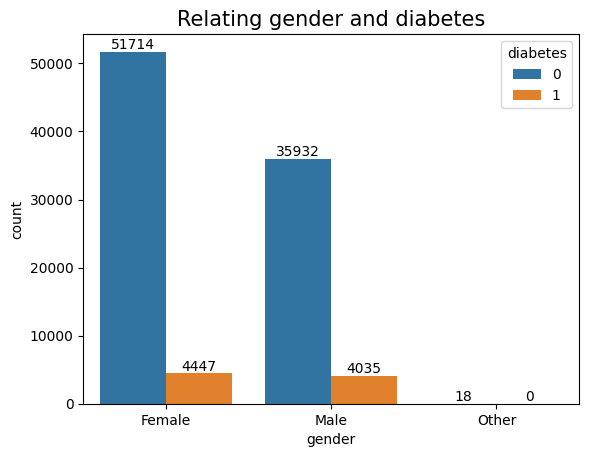

In [ ]:
ax = sns.countplot( x =df['gender'], hue = df['diabetes'])
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Relating gender and diabetes', size=15)
plt.show()

<ipython-input-53-af3ccae57e89>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['gender']).sum().plot(kind='pie', y='diabetes', autopct='%1.0f%%',


<Axes: ylabel='diabetes'>

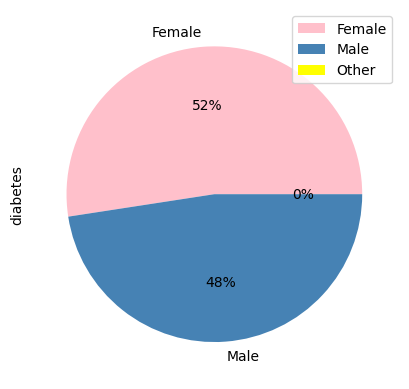

In [ ]:
df.groupby(['gender']).sum().plot(kind='pie', y='diabetes', autopct='%1.0f%%',
                    colors = ['pink', 'steelblue', 'yellow'],title='')

In [ ]:
pd.crosstab([df.gender, df.diabetes], df.smoking_history, margins=True)

smoking_history  No Info  current  ever  former  never  not current    All
gender diabetes                                                           
Female 0           17222     4560  2025    4094  20344         3469  51714
       1             747      451   211     649   1995          394   4447
Male   0           14214     3689  1500    3615  10714         2200  35932
       1             698      497   261     941   1342          296   4035
Other  0               6        0     1       0      3            8     18
All                32887     9197  3998    9299  34398         6367  96146

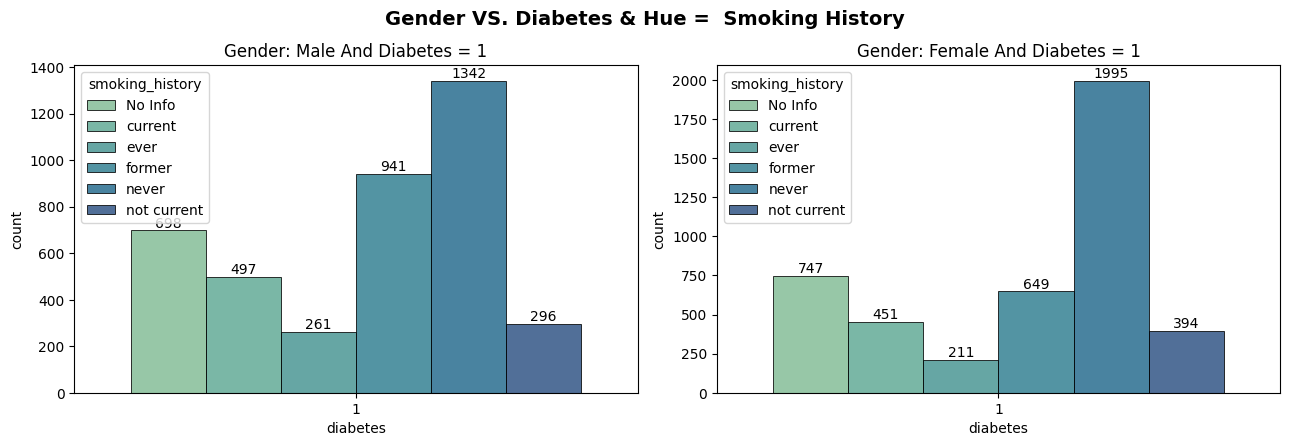

In [ ]:
fig = plt.figure(figsize = (13,8))

df_male = df[(df.gender == 'Male') & (df.diabetes == 1)]
plt.subplot(2,2,1)
ax = sns.countplot(x= df_male.diabetes, hue = df_male.smoking_history,
              linewidth = 0.7, edgecolor = 'k', saturation =1, palette='crest', alpha =0.8)
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Gender: Male And Diabetes = 1")

plt.subplot(2,2,2)
df_female = df[(df.gender == 'Female') & (df.diabetes == 1)]
bx = sns.countplot(x= df_female.diabetes, hue = df_female.smoking_history,
              linewidth = 0.7, edgecolor = 'k', saturation =1, palette='crest', alpha =0.8)
for i in bx.containers:
    bx.bar_label(i,)
plt.title("Gender: Female And Diabetes = 1")
fig.suptitle("Gender VS. Diabetes & Hue =  Smoking History", fontsize=14, fontweight='bold')
plt.tight_layout()

plt.show()

# Senaryo #3

In [ ]:
df.heart_disease.value_counts()

0    92223
1     3923
Name: heart_disease, dtype: int64

In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'gender_Male', 'gender_Other',
       'smoking_history_current', 'smoking_history_ever',
       'smoking_history_former', 'smoking_history_never',
       'smoking_history_not current'],
      dtype='object')

In [ ]:
X = df.drop('heart_disease', axis=1)
y = df['heart_disease']

%80-%20

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_predRF = RF.predict(x_test)

confusion_matrix = confusion_matrix(y_test, y_predRF)

print("RF Accuracy Rate: ", accuracy_score(y_test, y_predRF)*100)
print("RF Precision Rate: ", precision_score(y_test, y_predRF)*100)
print("RF Recall Rate: ", recall_score(y_test, y_predRF)*100)
print("RF F1 Score Rate: ", f1_score(y_test, y_predRF)*100)
print("Confisuon Matrix: \n", confusion_matrix )

RF Accuracy Rate:  95.43421736869475
RF Precision Rate:  10.989010989010989
RF Recall Rate:  1.2391573729863694
RF F1 Score Rate:  2.2271714922049
Confisuon Matrix: 
 [[18342    81]
 [  797    10]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier().fit(x_train, y_train)
y_predDT = DT.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predDT)

print("DTREE Accuracy Rate: ", accuracy_score(y_test, y_predDT)*100)
print("DTREE Precision Rate: ", precision_score(y_test, y_predDT)*100)
print("DTREE Recall Rate: ", recall_score(y_test, y_predDT)*100)
print("DTREE F1 Score Rate: ", f1_score(y_test, y_predDT)*100)
print("Confisuon Matrix: \n", confusion_matrix )

DTREE Accuracy Rate:  92.23608944357774
DTREE Precision Rate:  12.472647702407002
DTREE Recall Rate:  14.12639405204461
DTREE F1 Score Rate:  13.248111563044743
Confisuon Matrix: 
 [[17623   800]
 [  693   114]]


In [ ]:
from sklearn.svm import SVC
SVM_classification = SVC(C=10)

SVM_classification.fit(x_train, y_train)

y_head = SVM_classification.predict(x_test)

predictions = pd.DataFrame({'y_test': y_test,
                            'y_head': y_head})

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_head)

print("SVM Accuracy Rate: ", accuracy_score(y_test, y_head)*100)
print("SVM Precision Rate: ", precision_score(y_test, y_head, zero_division=0)*100)
print("SVM Recall Rate: ", recall_score(y_test, y_head, zero_division=0)*100)
print("SVM F1 Score Rate: ", f1_score(y_test, y_head, zero_division=0)*100)
print("Confisuon Matrix: \n", confusion_matrix )


SVM Accuracy Rate:  95.8034321372855
SVM Precision Rate:  0.0
SVM Recall Rate:  0.0
SVM F1 Score Rate:  0.0
Confisuon Matrix: 
 [[18423     0]
 [  807     0]]


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

NB = GaussianNB()

NB.fit(x_train, y_train)
NB_predict = NB.predict(x_test)
confusion_matrix = confusion_matrix(y_test, NB_predict)

print("NB Accuracy Rate: ", accuracy_score(y_test, NB_predict)*100)
print("NB Precision Rate: ", precision_score(y_test, NB_predict)*100)
print("NB Recall Rate: ", recall_score(y_test, NB_predict)*100)
print("NB F1 Score Rate: ", f1_score(y_test, NB_predict)*100)
print("Confisuon Matrix: \n", confusion_matrix )

NB Accuracy Rate:  81.01924076963078
NB Precision Rate:  13.049129191577851
NB Recall Rate:  62.20570012391574
NB F1 Score Rate:  21.572840567253976
Confisuon Matrix: 
 [[15078  3345]
 [  305   502]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

KNN = KNeighborsClassifier()

KNN.fit(x_train, y_train)
KNN_predict = KNN.predict(x_test)
confusion_matrix = confusion_matrix(y_test, KNN_predict)

print("KNN Accuracy Rate: ", accuracy_score(y_test, KNN_predict)*100)
print("KNN Precision Rate: ", precision_score(y_test, KNN_predict)*100)
print("KNN Recall Rate: ", recall_score(y_test, KNN_predict)*100)
print("KNN F1 Score Rate: ", f1_score(y_test, KNN_predict)*100)
print("Confisuon Matrix: \n", confusion_matrix )

KNN Accuracy Rate:  95.46541861674467
KNN Precision Rate:  19.047619047619047
KNN Recall Rate:  2.478314745972739
KNN F1 Score Rate:  4.385964912280702
Confisuon Matrix: 
 [[18338    85]
 [  787    20]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(max_iter=1000)

LR.fit(x_train, y_train)
LR_predict = LR.predict(x_test)
confusion_matrix = confusion_matrix(y_test, LR_predict)

print("KNN Accuracy Rate: ", accuracy_score(y_test, LR_predict)*100)
print("KNN Precision Rate: ", precision_score(y_test, LR_predict)*100)
print("KNN Recall Rate: ", recall_score(y_test, LR_predict)*100)
print("KNN F1 Score Rate: ", f1_score(y_test, LR_predict)*100)
print("Confisuon Matrix: \n", confusion_matrix )

KNN Accuracy Rate:  95.8034321372855
KNN Precision Rate:  50.0
KNN Recall Rate:  1.2391573729863694
KNN F1 Score Rate:  2.418379685610641
Confisuon Matrix: 
 [[18413    10]
 [  797    10]]


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

MLP = MLPClassifier()
MLP.fit(x_train, y_train)
MLP_predicted = MLP.predict(x_test)
confusion_matrix = confusion_matrix(y_test, MLP_predicted)

print("MLP Accuracy Rate: ", accuracy_score(y_test, MLP_predicted)*100)
print("MLP Precision Rate: ", precision_score(y_test, MLP_predicted, zero_division=0)*100)
print("MLP Recall Rate: ", recall_score(y_test, MLP_predicted)*100)
print("MLP F1 Score Rate: ", f1_score(y_test, MLP_predicted)*100)
print("Confisuon Matrix: \n", confusion_matrix )


MLP Accuracy Rate:  95.8034321372855
MLP Precision Rate:  0.0
MLP Recall Rate:  0.0
MLP F1 Score Rate:  0.0
Confisuon Matrix: 
 [[18423     0]
 [  807     0]]


hiperparametre optimizasyonları

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [3, 9]
}
RF = RandomForestClassifier()
grid = GridSearchCV(RF, param_grid=param_grid, cv=5, verbose=3, n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_estimator_)
print(grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
RandomForestClassifier(max_depth=9)
{'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 100}


In [ ]:
param_grid = {'max_features': ['auto', 'sqrt','log2'],
              'ccp_alpha': [0.1, 0.01],
              'max_depth': [5, 7],
              'criterion': ['entropy', 'gini']
            }

tree = DecisionTreeClassifier()

grid = GridSearchCV(tree, param_grid, cv=5, verbose=3, n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'ccp_alpha': 0.1, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto'}


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [ ]:
param_grid = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'] }

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, verbose = 3, n_jobs=-1)

grid.fit(x_train, y_train)
print(grid.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'kernel': 'linear'}


In [ ]:
knn = KNeighborsClassifier()

k_range = list(range(1, 31))

param_grid = dict(n_neighbors = k_range)

grid = GridSearchCV(knn, param_grid, cv=5, verbose = 3, n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'n_neighbors': 23}


In [ ]:
np.logspace(0,-9, num=10)

from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=5,
                                    n_repeats=3,
                                    random_state=999)

from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=GaussianNB(),
                     param_grid=params_NB,
                     cv=cv_method,
                     verbose=3, n_jobs=-1)

Data_transformed = PowerTransformer().fit_transform(x_test)
gs_NB.fit(Data_transformed, y_test);
print(gs_NB.best_params_)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
{'var_smoothing': 1.0}


In [ ]:
LR = LogisticRegression()

param_grid = [
    {
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg'],
    'max_iter' : [ 1000]
     }
 ]

grid = GridSearchCV(LR, param_grid = param_grid, cv=5, verbose=3, n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'C': 0.0001, 'max_iter': 1000, 'solver': 'lbfgs'}


In [ ]:
MLP = MLPClassifier(max_iter=100)
param_grid = {
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(MLP, param_grid, cv=5, verbose=3, n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'activation': 'tanh', 'alpha': 0.0001, 'learning_rate': 'constant', 'solver': 'sgd'}


%75-%25

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_predRF = RF.predict(x_test)

confusion_matrix = confusion_matrix(y_test, y_predRF)

print("RF Accuracy Rate: ", accuracy_score(y_test, y_predRF)*100)
print("RF Precision Rate: ", precision_score(y_test, y_predRF)*100)
print("RF Recall Rate: ", recall_score(y_test, y_predRF)*100)
print("RF F1 Score Rate: ", f1_score(y_test, y_predRF)*100)
print("Confisuon Matrix: \n", confusion_matrix )

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier().fit(x_train, y_train)
y_predDT = DT.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predDT)

print("DTREE Accuracy Rate: ", accuracy_score(y_test, y_predDT)*100)
print("DTREE Precision Rate: ", precision_score(y_test, y_predDT)*100)
print("DTREE Recall Rate: ", recall_score(y_test, y_predDT)*100)
print("DTREE F1 Score Rate: ", f1_score(y_test, y_predDT)*100)
print("Confisuon Matrix: \n", confusion_matrix )

In [ ]:
from sklearn.svm import SVC
SVM_classification = SVC()
SVM_classification.fit(x_train, y_train)

y_head = SVM_classification.predict(x_test)

predictions = pd.DataFrame({'y_test': y_test,
                            'y_head': y_head})

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_head)

print("SVM Accuracy Rate: ", accuracy_score(y_test, y_head)*100)
print("SVM Precision Rate: ", precision_score(y_test, y_head, zero_division=0)*100)
print("SVM Recall Rate: ", recall_score(y_test, y_head, zero_division=0)*100)
print("SVM F1 Score Rate: ", f1_score(y_test, y_head, zero_division=0)*100)
print("Confisuon Matrix: \n", confusion_matrix )

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

NB = GaussianNB()

NB.fit(x_train, y_train)
NB_predict = NB.predict(x_test)
confusion_matrix = confusion_matrix(y_test, NB_predict)

print("NB Accuracy Rate: ", accuracy_score(y_test, NB_predict)*100)
print("NB Precision Rate: ", precision_score(y_test, NB_predict)*100)
print("NB Recall Rate: ", recall_score(y_test, NB_predict)*100)
print("NB F1 Score Rate: ", f1_score(y_test, NB_predict)*100)
print("Confisuon Matrix: \n", confusion_matrix )

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

KNN = KNeighborsClassifier()

KNN.fit(x_train, y_train)
KNN_predict = KNN.predict(x_test)
confusion_matrix = confusion_matrix(y_test, KNN_predict)

print("KNN Accuracy Rate: ", accuracy_score(y_test, KNN_predict)*100)
print("KNN Precision Rate: ", precision_score(y_test, KNN_predict)*100)
print("KNN Recall Rate: ", recall_score(y_test, KNN_predict)*100)
print("KNN F1 Score Rate: ", f1_score(y_test, KNN_predict)*100)
print("Confisuon Matrix: \n", confusion_matrix )

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(max_iter=1000)

LR.fit(x_train, y_train)
LR_predict = LR.predict(x_test)
confusion_matrix = confusion_matrix(y_test, LR_predict)

print("KNN Accuracy Rate: ", accuracy_score(y_test, LR_predict)*100)
print("KNN Precision Rate: ", precision_score(y_test, LR_predict)*100)
print("KNN Recall Rate: ", recall_score(y_test, LR_predict)*100)
print("KNN F1 Score Rate: ", f1_score(y_test, LR_predict)*100)
print("Confisuon Matrix: \n", confusion_matrix )

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

MLP = MLPClassifier()
MLP.fit(x_train, y_train)
MLP_predicted = MLP.predict(x_test)
confusion_matrix = confusion_matrix(y_test, MLP_predicted)

print("MLP Accuracy Rate: ", accuracy_score(y_test, MLP_predicted)*100)
print("MLP Precision Rate: ", precision_score(y_test, MLP_predicted, zero_division=0)*100)
print("MLP Recall Rate: ", recall_score(y_test, MLP_predicted)*100)
print("MLP F1 Score Rate: ", f1_score(y_test, MLP_predicted)*100)
print("Confisuon Matrix: \n", confusion_matrix )

%70-%30

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_predRF = RF.predict(x_test)

confusion_matrix = confusion_matrix(y_test, y_predRF)

print("RF Accuracy Rate: ", accuracy_score(y_test, y_predRF)*100)
print("RF Precision Rate: ", precision_score(y_test, y_predRF)*100)
print("RF Recall Rate: ", recall_score(y_test, y_predRF)*100)
print("RF F1 Score Rate: ", f1_score(y_test, y_predRF)*100)
print("Confisuon Matrix: \n", confusion_matrix )

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier().fit(x_train, y_train)
y_predDT = DT.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predDT)

print("DTREE Accuracy Rate: ", accuracy_score(y_test, y_predDT)*100)
print("DTREE Precision Rate: ", precision_score(y_test, y_predDT)*100)
print("DTREE Recall Rate: ", recall_score(y_test, y_predDT)*100)
print("DTREE F1 Score Rate: ", f1_score(y_test, y_predDT)*100)
print("Confisuon Matrix: \n", confusion_matrix )

In [ ]:
from sklearn.svm import SVC

SVM_classification = SVC(C=2,)
SVM_classification.fit(x_train, y_train)

y_head = SVM_classification.predict(x_test)

predictions = pd.DataFrame({'y_test': y_test,
                            'y_head': y_head})

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_head)

print("SVM Accuracy Rate: ", accuracy_score(y_test, y_head)*100)
print("SVM Precision Rate: ", precision_score(y_test, y_head, zero_division=0)*100)
print("SVM Recall Rate: ", recall_score(y_test, y_head, zero_division=0)*100)
print("SVM F1 Score Rate: ", f1_score(y_test, y_head, zero_division=0)*100)
print("Confisuon Matrix: \n", confusion_matrix )

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

NB = GaussianNB()

NB.fit(x_train, y_train)
NB_predict = NB.predict(x_test)
confusion_matrix = confusion_matrix(y_test, NB_predict)

print("NB Accuracy Rate: ", accuracy_score(y_test, NB_predict)*100)
print("NB Precision Rate: ", precision_score(y_test, NB_predict)*100)
print("NB Recall Rate: ", recall_score(y_test, NB_predict)*100)
print("NB F1 Score Rate: ", f1_score(y_test, NB_predict)*100)
print("Confisuon Matrix: \n", confusion_matrix )

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

KNN = KNeighborsClassifier()

KNN.fit(x_train, y_train)
KNN_predict = KNN.predict(x_test)
confusion_matrix = confusion_matrix(y_test, KNN_predict)

print("KNN Accuracy Rate: ", accuracy_score(y_test, KNN_predict)*100)
print("KNN Precision Rate: ", precision_score(y_test, KNN_predict)*100)
print("KNN Recall Rate: ", recall_score(y_test, KNN_predict)*100)
print("KNN F1 Score Rate: ", f1_score(y_test, KNN_predict)*100)
print("Confisuon Matrix: \n", confusion_matrix )

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(max_iter=1000)

LR.fit(x_train, y_train)
LR_predict = LR.predict(x_test)
confusion_matrix = confusion_matrix(y_test, LR_predict)

print("KNN Accuracy Rate: ", accuracy_score(y_test, LR_predict)*100)
print("KNN Precision Rate: ", precision_score(y_test, LR_predict)*100)
print("KNN Recall Rate: ", recall_score(y_test, LR_predict)*100)
print("KNN F1 Score Rate: ", f1_score(y_test, LR_predict)*100)
print("Confisuon Matrix: \n", confusion_matrix )

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

MLP = MLPClassifier()
MLP.fit(x_train, y_train)
MLP_predicted = MLP.predict(x_test)
confusion_matrix = confusion_matrix(y_test, MLP_predicted)

print("MLP Accuracy Rate: ", accuracy_score(y_test, MLP_predicted)*100)
print("MLP Precision Rate: ", precision_score(y_test, MLP_predicted, zero_division=0)*100)
print("MLP Recall Rate: ", recall_score(y_test, MLP_predicted)*100)
print("MLP F1 Score Rate: ", f1_score(y_test, MLP_predicted)*100)
print("Confisuon Matrix: \n", confusion_matrix )

# SENARYO #4

In [ ]:
df = df[df.age >= 45]
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,No Info,27.32,6.6,80,0
4,Male,76,1,1,current,20.14,4.8,155,0
7,Female,79,0,0,No Info,23.86,5.7,85,0
10,Female,53,0,0,never,27.32,6.1,85,0


In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'gender_Male', 'gender_Other',
       'smoking_history_current', 'smoking_history_ever',
       'smoking_history_former', 'smoking_history_never',
       'smoking_history_not current'],
      dtype='object')

In [ ]:
X = X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

%80-%20

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_predRF = RF.predict(x_test)

confusion_matrix = confusion_matrix(y_test, y_predRF)

print("RF Accuracy Rate: ", accuracy_score(y_test, y_predRF)*100)
print("RF Precision Rate: ", precision_score(y_test, y_predRF)*100)
print("RF Recall Rate: ", recall_score(y_test, y_predRF)*100)
print("RF F1 Score Rate: ", f1_score(y_test, y_predRF)*100)
print("Confisuon Matrix: \n", confusion_matrix )

RF Accuracy Rate:  94.35157871736043
RF Precision Rate:  94.68085106382979
RF Recall Rate:  70.0327868852459
RF F1 Score Rate:  80.51262721447418
Confisuon Matrix: 
 [[7568   60]
 [ 457 1068]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier().fit(x_train, y_train)
y_predDT = DT.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predDT)

print("DTREE Accuracy Rate: ", accuracy_score(y_test, y_predDT)*100)
print("DTREE Precision Rate: ", precision_score(y_test, y_predDT)*100)
print("DTREE Recall Rate: ", recall_score(y_test, y_predDT)*100)
print("DTREE F1 Score Rate: ", f1_score(y_test, y_predDT)*100)
print("Confisuon Matrix: \n", confusion_matrix )

DTREE Accuracy Rate:  94.8361934477379
DTREE Precision Rate:  70.28985507246377
DTREE Recall Rate:  73.27135386403253
DTREE F1 Score Rate:  71.74964438122332
Confisuon Matrix: 
 [[16976   533]
 [  460  1261]]


In [ ]:
from sklearn.svm import SVC

SVM_classification = SVC()
SVM_classification.fit(x_train, y_train)

y_head = SVM_classification.predict(x_test)

predictions = pd.DataFrame({'y_test': y_test,
                            'y_head': y_head})

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_head)

print("SVM Accuracy Rate: ", accuracy_score(y_test, y_head)*100)
print("SVM Precision Rate: ", precision_score(y_test, y_head, zero_division=0)*100)
print("SVM Recall Rate: ", recall_score(y_test, y_head, zero_division=0)*100)
print("SVM F1 Score Rate: ", f1_score(y_test, y_head, zero_division=0)*100)
print("Confisuon Matrix: \n", confusion_matrix )

SVM Accuracy Rate:  89.59941733430445
SVM Precision Rate:  100.0
SVM Recall Rate:  36.44859813084112
SVM F1 Score Rate:  53.42465753424658
Confisuon Matrix: 
 [[11483     0]
 [ 1428   819]]


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

NB = GaussianNB()

NB.fit(x_train, y_train)
NB_predict = NB.predict(x_test)
confusion_matrix = confusion_matrix(y_test, NB_predict)

print("NB Accuracy Rate: ", accuracy_score(y_test, NB_predict)*100)
print("NB Precision Rate: ", precision_score(y_test, NB_predict)*100)
print("NB Recall Rate: ", recall_score(y_test, NB_predict)*100)
print("NB F1 Score Rate: ", f1_score(y_test, NB_predict)*100)
print("Confisuon Matrix: \n", confusion_matrix )

NB Accuracy Rate:  83.9724680432645
NB Precision Rate:  51.23404255319149
NB Recall Rate:  78.95081967213115
NB F1 Score Rate:  62.14193548387097
Confisuon Matrix: 
 [[6482 1146]
 [ 321 1204]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

KNN = KNeighborsClassifier()

KNN.fit(x_train, y_train)
KNN_predict = KNN.predict(x_test)
confusion_matrix = confusion_matrix(y_test, KNN_predict)

print("KNN Accuracy Rate: ", accuracy_score(y_test, KNN_predict)*100)
print("KNN Precision Rate: ", precision_score(y_test, KNN_predict)*100)
print("KNN Recall Rate: ", recall_score(y_test, KNN_predict)*100)
print("KNN F1 Score Rate: ", f1_score(y_test, KNN_predict)*100)
print("Confisuon Matrix: \n", confusion_matrix )

KNN Accuracy Rate:  91.3033977930733
KNN Precision Rate:  88.00834202294057
KNN Recall Rate:  55.34426229508197
KNN F1 Score Rate:  67.95491143317231
Confisuon Matrix: 
 [[7513  115]
 [ 681  844]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(max_iter=1000)

LR.fit(x_train, y_train)
LR_predict = LR.predict(x_test)
confusion_matrix = confusion_matrix(y_test, LR_predict)

print("KNN Accuracy Rate: ", accuracy_score(y_test, LR_predict)*100)
print("KNN Precision Rate: ", precision_score(y_test, LR_predict)*100)
print("KNN Recall Rate: ", recall_score(y_test, LR_predict)*100)
print("KNN F1 Score Rate: ", f1_score(y_test, LR_predict)*100)
print("Confisuon Matrix: \n", confusion_matrix )

KNN Accuracy Rate:  92.65814487053426
KNN Precision Rate:  86.92640692640693
KNN Recall Rate:  65.8360655737705
KNN F1 Score Rate:  74.92537313432835
Confisuon Matrix: 
 [[7477  151]
 [ 521 1004]]


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

MLP = MLPClassifier()
MLP.fit(x_train, y_train)
MLP_predicted = MLP.predict(x_test)
confusion_matrix = confusion_matrix(y_test, MLP_predicted)

print("MLP Accuracy Rate: ", accuracy_score(y_test, MLP_predicted)*100)
print("MLP Precision Rate: ", precision_score(y_test, MLP_predicted, zero_division=0)*100)
print("MLP Recall Rate: ", recall_score(y_test, MLP_predicted)*100)
print("MLP F1 Score Rate: ", f1_score(y_test, MLP_predicted)*100)
print("Confisuon Matrix: \n", confusion_matrix )

MLP Accuracy Rate:  93.08084486525856
MLP Precision Rate:  95.8303886925795
MLP Recall Rate:  60.34712950600801
MLP F1 Score Rate:  74.0578918623703
Confisuon Matrix: 
 [[11424    59]
 [  891  1356]]


hiper parametre optimizasyonları

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [25, 50, 100],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
RF = RandomForestClassifier()
grid = GridSearchCV(RF, param_grid=param_grid, cv=5, verbose=3, n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_estimator_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
RandomForestClassifier(max_depth=3, max_features=None, max_leaf_nodes=3,
                       n_estimators=25)


In [ ]:
param_grid = {'max_features': ['sqrt','log2'],
              'ccp_alpha': [0.1, 0.01, 0.001],
              'max_depth': [5, 6, 7, 8],
              'criterion': ['entropy', 'gini']
            }

tree = DecisionTreeClassifier()

grid = GridSearchCV(tree, param_grid, cv=5, verbose=3, n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt'}


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, verbose = 3, n_jobs=-1)

grid.fit(x_train, y_train)
print(grid.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'kernel': 'linear'}


In [ ]:
np.logspace(0,-9, num=10)

from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=5,
                                    n_repeats=3,
                                    random_state=999)

from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator= GaussianNB(),
                     param_grid=params_NB,
                     cv=cv_method,
                     verbose=3,
                     n_jobs=-1)

Data_transformed = PowerTransformer().fit_transform(x_test)
gs_NB.fit(Data_transformed, y_test);
print(gs_NB.best_params_)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
{'var_smoothing': 0.43287612810830584}


In [ ]:
knn = KNeighborsClassifier()

k_range = list(range(1, 31))

param_grid = dict(n_neighbors = k_range)

grid = GridSearchCV(knn, param_grid, cv=5, verbose = 3, n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'n_neighbors': 4}


In [ ]:
LR = LogisticRegression()

param_grid = [
    {
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg'],
    'max_iter' : [ 1000]
     }
 ]

grid = GridSearchCV(LR, param_grid = param_grid, cv=5, verbose=3, n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'C': 0.012742749857031334, 'max_iter': 1000, 'solver': 'newton-cg'}


In [ ]:
MLP = MLPClassifier(max_iter=100)
param_grid = {
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(MLP, param_grid, cv=5, verbose=3, n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'activation': 'relu', 'alpha': 0.05, 'learning_rate': 'adaptive', 'solver': 'adam'}


%75-%25

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_predRF = RF.predict(x_test)

confusion_matrix = confusion_matrix(y_test, y_predRF)

print("RF Accuracy Rate: ", accuracy_score(y_test, y_predRF)*100)
print("RF Precision Rate: ", precision_score(y_test, y_predRF)*100)
print("RF Recall Rate: ", recall_score(y_test, y_predRF)*100)
print("RF F1 Score Rate: ", f1_score(y_test, y_predRF)*100)
print("Confisuon Matrix: \n", confusion_matrix )

RF Accuracy Rate:  94.43230486845555
RF Precision Rate:  94.18026969481902
RF Recall Rate:  70.51009564293305
RF F1 Score Rate:  80.64418109996961
Confisuon Matrix: 
 [[9477   82]
 [ 555 1327]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier().fit(x_train, y_train)
y_predDT = DT.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predDT)

print("DTREE Accuracy Rate: ", accuracy_score(y_test, y_predDT)*100)
print("DTREE Precision Rate: ", precision_score(y_test, y_predDT)*100)
print("DTREE Recall Rate: ", recall_score(y_test, y_predDT)*100)
print("DTREE F1 Score Rate: ", f1_score(y_test, y_predDT)*100)
print("Confisuon Matrix: \n", confusion_matrix )

DTREE Accuracy Rate:  91.01477143606328
DTREE Precision Rate:  71.43574297188755
DTREE Recall Rate:  75.61105207226355
DTREE F1 Score Rate:  73.46411977284461
Confisuon Matrix: 
 [[8990  569]
 [ 459 1423]]


In [ ]:
from sklearn.svm import SVC

SVM_classification = SVC()
SVM_classification.fit(x_train, y_train)

y_head = SVM_classification.predict(x_test)

predictions = pd.DataFrame({'y_test': y_test,
                            'y_head': y_head})

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_head)

print("SVM Accuracy Rate: ", accuracy_score(y_test, y_head)*100)
print("SVM Precision Rate: ", precision_score(y_test, y_head, zero_division=0)*100)
print("SVM Recall Rate: ", recall_score(y_test, y_head, zero_division=0)*100)
print("SVM F1 Score Rate: ", f1_score(y_test, y_head, zero_division=0)*100)
print("Confisuon Matrix: \n", confusion_matrix )

SVM Accuracy Rate:  89.51140634559917
SVM Precision Rate:  100.0
SVM Recall Rate:  36.23804463336875
SVM F1 Score Rate:  53.198127925117
Confisuon Matrix: 
 [[9559    0]
 [1200  682]]


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

NB = GaussianNB()

NB.fit(x_train, y_train)
NB_predict = NB.predict(x_test)
confusion_matrix = confusion_matrix(y_test, NB_predict)

print("NB Accuracy Rate: ", accuracy_score(y_test, NB_predict)*100)
print("NB Precision Rate: ", precision_score(y_test, NB_predict)*100)
print("NB Recall Rate: ", recall_score(y_test, NB_predict)*100)
print("NB F1 Score Rate: ", f1_score(y_test, NB_predict)*100)
print("Confisuon Matrix: \n", confusion_matrix )

NB Accuracy Rate:  83.91748972991871
NB Precision Rate:  50.720658888126295
NB Recall Rate:  78.53347502656747
NB F1 Score Rate:  61.634695579649716
Confisuon Matrix: 
 [[8123 1436]
 [ 404 1478]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

KNN = KNeighborsClassifier()

KNN.fit(x_train, y_train)
KNN_predict = KNN.predict(x_test)
confusion_matrix = confusion_matrix(y_test, KNN_predict)

print("KNN Accuracy Rate: ", accuracy_score(y_test, KNN_predict)*100)
print("KNN Precision Rate: ", precision_score(y_test, KNN_predict)*100)
print("KNN Recall Rate: ", recall_score(y_test, KNN_predict)*100)
print("KNN F1 Score Rate: ", f1_score(y_test, KNN_predict)*100)
print("Confisuon Matrix: \n", confusion_matrix )

KNN Accuracy Rate:  91.52172012935932
KNN Precision Rate:  88.70967741935483
KNN Recall Rate:  55.5260361317747
KNN F1 Score Rate:  68.30065359477123
Confisuon Matrix: 
 [[9426  133]
 [ 837 1045]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(max_iter=1000)

LR.fit(x_train, y_train)
LR_predict = LR.predict(x_test)
confusion_matrix = confusion_matrix(y_test, LR_predict)

print("KNN Accuracy Rate: ", accuracy_score(y_test, LR_predict)*100)
print("KNN Precision Rate: ", precision_score(y_test, LR_predict)*100)
print("KNN Recall Rate: ", recall_score(y_test, LR_predict)*100)
print("KNN F1 Score Rate: ", f1_score(y_test, LR_predict)*100)
print("Confisuon Matrix: \n", confusion_matrix )

KNN Accuracy Rate:  92.74538938903942
KNN Precision Rate:  86.62952646239555
KNN Recall Rate:  66.09989373007438
KNN F1 Score Rate:  74.9849306811332
Confisuon Matrix: 
 [[9367  192]
 [ 638 1244]]


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

MLP = MLPClassifier()
MLP.fit(x_train, y_train)
MLP_predicted = MLP.predict(x_test)
confusion_matrix = confusion_matrix(y_test, MLP_predicted)

print("MLP Accuracy Rate: ", accuracy_score(y_test, MLP_predicted)*100)
print("MLP Precision Rate: ", precision_score(y_test, MLP_predicted, zero_division=0)*100)
print("MLP Recall Rate: ", recall_score(y_test, MLP_predicted)*100)
print("MLP F1 Score Rate: ", f1_score(y_test, MLP_predicted)*100)
print("Confisuon Matrix: \n", confusion_matrix )

MLP Accuracy Rate:  93.27855956647146
MLP Precision Rate:  94.06175771971496
MLP Recall Rate:  63.12433581296493
MLP F1 Score Rate:  75.54848966613673
Confisuon Matrix: 
 [[9484   75]
 [ 694 1188]]


hiper parametre optimizasyonları

%70-%30

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_predRF = RF.predict(x_test)

confusion_matrix = confusion_matrix(y_test, y_predRF)

print("RF Accuracy Rate: ", accuracy_score(y_test, y_predRF)*100)
print("RF Precision Rate: ", precision_score(y_test, y_predRF)*100)
print("RF Recall Rate: ", recall_score(y_test, y_predRF)*100)
print("RF F1 Score Rate: ", f1_score(y_test, y_predRF)*100)
print("Confisuon Matrix: \n", confusion_matrix )

RF Accuracy Rate:  94.34085943190095
RF Precision Rate:  93.95933014354067
RF Recall Rate:  69.91544281263907
RF F1 Score Rate:  80.1735136514417
Confisuon Matrix: 
 [[11382   101]
 [  676  1571]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier().fit(x_train, y_train)
y_predDT = DT.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predDT)

print("DTREE Accuracy Rate: ", accuracy_score(y_test, y_predDT)*100)
print("DTREE Precision Rate: ", precision_score(y_test, y_predDT)*100)
print("DTREE Recall Rate: ", recall_score(y_test, y_predDT)*100)
print("DTREE F1 Score Rate: ", f1_score(y_test, y_predDT)*100)
print("Confisuon Matrix: \n", confusion_matrix )

DTREE Accuracy Rate:  91.31099781500365
DTREE Precision Rate:  72.46376811594203
DTREE Recall Rate:  75.65643079661771
DTREE F1 Score Rate:  74.02569126932288
Confisuon Matrix: 
 [[10837   646]
 [  547  1700]]


In [ ]:
from sklearn.svm import SVC

SVM_classification = SVC()
SVM_classification.fit(x_train, y_train)

y_head = SVM_classification.predict(x_test)

predictions = pd.DataFrame({'y_test': y_test,
                            'y_head': y_head})

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_head)

print("SVM Accuracy Rate: ", accuracy_score(y_test, y_head)*100)
print("SVM Precision Rate: ", precision_score(y_test, y_head, zero_division=0)*100)
print("SVM Recall Rate: ", recall_score(y_test, y_head, zero_division=0)*100)
print("SVM F1 Score Rate: ", f1_score(y_test, y_head, zero_division=0)*100)
print("Confisuon Matrix: \n", confusion_matrix )

SVM Accuracy Rate:  89.59941733430445
SVM Precision Rate:  100.0
SVM Recall Rate:  36.44859813084112
SVM F1 Score Rate:  53.42465753424658
Confisuon Matrix: 
 [[11483     0]
 [ 1428   819]]


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

NB = GaussianNB()

NB.fit(x_train, y_train)
NB_predict = NB.predict(x_test)
confusion_matrix = confusion_matrix(y_test, NB_predict)

print("NB Accuracy Rate: ", accuracy_score(y_test, NB_predict)*100)
print("NB Precision Rate: ", precision_score(y_test, NB_predict)*100)
print("NB Recall Rate: ", recall_score(y_test, NB_predict)*100)
print("NB F1 Score Rate: ", f1_score(y_test, NB_predict)*100)
print("Confisuon Matrix: \n", confusion_matrix )

NB Accuracy Rate:  83.86016023306628
NB Precision Rate:  50.44071651976117
NB Recall Rate:  78.94971072541166
NB F1 Score Rate:  61.55447605829285
Confisuon Matrix: 
 [[9740 1743]
 [ 473 1774]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

KNN = KNeighborsClassifier()

KNN.fit(x_train, y_train)
KNN_predict = KNN.predict(x_test)
confusion_matrix = confusion_matrix(y_test, KNN_predict)

print("KNN Accuracy Rate: ", accuracy_score(y_test, KNN_predict)*100)
print("KNN Precision Rate: ", precision_score(y_test, KNN_predict)*100)
print("KNN Recall Rate: ", recall_score(y_test, KNN_predict)*100)
print("KNN F1 Score Rate: ", f1_score(y_test, KNN_predict)*100)
print("Confisuon Matrix: \n", confusion_matrix )

KNN Accuracy Rate:  91.60233066278222
KNN Precision Rate:  88.73937677053824
KNN Recall Rate:  55.7632398753894
KNN F1 Score Rate:  68.4886581033069
Confisuon Matrix: 
 [[11324   159]
 [  994  1253]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(max_iter=1000)

LR.fit(x_train, y_train)
LR_predict = LR.predict(x_test)
confusion_matrix = confusion_matrix(y_test, LR_predict)

print("KNN Accuracy Rate: ", accuracy_score(y_test, LR_predict)*100)
print("KNN Precision Rate: ", precision_score(y_test, LR_predict)*100)
print("KNN Recall Rate: ", recall_score(y_test, LR_predict)*100)
print("KNN F1 Score Rate: ", f1_score(y_test, LR_predict)*100)
print("Confisuon Matrix: \n", confusion_matrix )

KNN Accuracy Rate:  92.74581209031318
KNN Precision Rate:  86.51488616462348
KNN Recall Rate:  65.95460614152204
KNN F1 Score Rate:  74.84848484848486
Confisuon Matrix: 
 [[11252   231]
 [  765  1482]]


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

MLP = MLPClassifier()
MLP.fit(x_train, y_train)
MLP_predicted = MLP.predict(x_test)
confusion_matrix = confusion_matrix(y_test, MLP_predicted)

print("MLP Accuracy Rate: ", accuracy_score(y_test, MLP_predicted)*100)
print("MLP Precision Rate: ", precision_score(y_test, MLP_predicted, zero_division=0)*100)
print("MLP Recall Rate: ", recall_score(y_test, MLP_predicted)*100)
print("MLP F1 Score Rate: ", f1_score(y_test, MLP_predicted)*100)
print("Confisuon Matrix: \n", confusion_matrix )

MLP Accuracy Rate:  93.24107793153678
MLP Precision Rate:  94.59093982420555
MLP Recall Rate:  62.26079216733422
MLP F1 Score Rate:  75.09393451422437
Confisuon Matrix: 
 [[11403    80]
 [  848  1399]]
